# Titanic: Machine Learning from Disaster

## Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.


Overkill using tensorflow

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


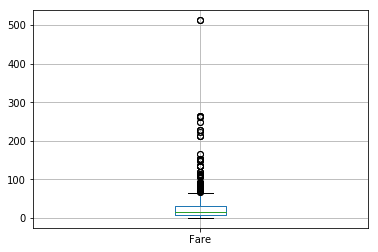

In [6]:
import matplotlib.pyplot as plt
data.boxplot(column=['Fare'])
plt.show()

In [7]:
# Create bin categories for Fare.
groups = ['low','medium','high','very_high']

# Create range for each bin categories of Fare.
cut_points = [-1, 130, 260, 390, 520]
# Create and view categorized Fare with original Fare.
data['Fare_binned'] = pd.cut(data.Fare, cut_points, labels = groups)

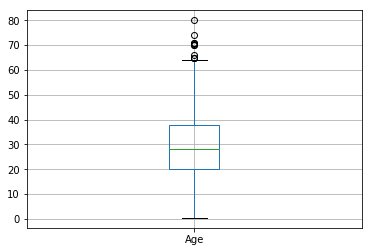

In [8]:
# fare seems to have a lot of outliers
import matplotlib.pyplot as plt
data.boxplot(column=['Age'])
plt.show()

In [9]:
# Create bin categories for Age.
label_names = ['infant','child','teenager','young_adult','adult','aged']

# Create range for each bin categories of Age.
cut_points = [0,5,12,18,35,60,81]

# Create and view categorized Age with original Age.
data['Age_binned'] = pd.cut(data.Age, cut_points, labels = label_names)

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)
    
data['Family_size'] = data.SibSp + data.Parch + 1 

data['Title'] = data.Name.str.extract('([A-Za-z]+)\.')
# Create a bucket Officer and put Dr, Rev, Col, Major, Capt titles into it.
data['Title'].replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace = True)

# Put Dona, Jonkheer, Countess, Sir, Lady, Don in bucket Aristocrat.
data['Title'].replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)

# Finally Replace Mlle and Ms with Miss. And Mme with Mrs.
data['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)



y_data = data["Survived"].copy()
X_data = data.drop(labels=["PassengerId", "Survived", "Name", "Ticket", "Cabin", "Fare", "Age"], axis=1)


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', MostFrequentImputer()),
    ('cat_encode', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, ["SibSp", "Parch", "Family_size"]),
    ('cat', cat_pipeline, ["Pclass", "Sex", "Embarked", "Age_binned", "Fare_binned", "Title"])
])
x_train_prepared = full_pipeline.fit_transform(X_data)
df = pd.DataFrame(x_train_prepared)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.432793,-0.473674,0.059160,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.432793,-0.473674,0.059160,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.474545,-0.473674,-0.560975,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.432793,-0.473674,0.059160,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.474545,-0.473674,-0.560975,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

X_train, X_test, y_train, y_test = train_test_split(x_train_prepared, y_data)

In [28]:
log_clf = LogisticRegression(solver="lbfgs", penalty="l2")
rnd_clf = RandomForestClassifier(n_estimators=1000)
svm_clf = SVC(probability=True, gamma="auto", kernel="rbf")
extree_clf = ExtraTreesClassifier(n_estimators=1000)
kn_clf = KNeighborsClassifier(n_neighbors=5)
sdg_clf = SGDClassifier(loss="log", max_iter=1000, tol=1e-3, penalty="elasticnet", alpha=0.001)

In [29]:
voting_clf_soft = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('extra', extree_clf), ('kn', kn_clf), ('sdg', sdg_clf)],
    voting='soft'
)

In [30]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, extree_clf, kn_clf, sdg_clf, voting_clf_soft):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8385650224215246


RandomForestClassifier 0.8161434977578476
SVC 0.8565022421524664


ExtraTreesClassifier 0.8071748878923767
KNeighborsClassifier 0.8385650224215246
SGDClassifier 0.820627802690583


VotingClassifier 0.8565022421524664


In [37]:
data_test = pd.read_csv("data/test.csv")

# Create bin categories for Fare.
groups = ['low','medium','high','very_high']

# Create range for each bin categories of Fare.
cut_points = [-1, 130, 260, 390, 520]
# Create and view categorized Fare with original Fare.
data_test['Fare_binned'] = pd.cut(data_test.Fare, cut_points, labels = groups)

# Create bin categories for Age.
label_names = ['infant','child','teenager','young_adult','adult','aged']

# Create range for each bin categories of Age.
cut_points = [0,5,12,18,35,60,81]

# Create and view categorized Age with original Age.
data_test['Age_binned'] = pd.cut(data_test.Age, cut_points, labels = label_names)

data_test['Family_size'] = data_test.SibSp + data_test.Parch + 1 

data_test['Title'] = data_test.Name.str.extract('([A-Za-z]+)\.')
# Create a bucket Officer and put Dr, Rev, Col, Major, Capt titles into it.
data_test['Title'].replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace = True)

# Put Dona, Jonkheer, Countess, Sir, Lady, Don in bucket Aristocrat.
data_test['Title'].replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)

# Finally Replace Mlle and Ms with Miss. And Mme with Mrs.
data_test['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

testID = data_test['PassengerId'].copy()
X_data_test = data_test.drop(labels=["PassengerId", "Name", "Ticket", "Cabin", "Fare", "Age"], axis=1)

x_test_prepared = full_pipeline.fit_transform(X_data_test)

In [38]:
submission = pd.DataFrame({
        "PassengerId": testID,
        "Survived": voting_clf_soft.predict(x_test_prepared)})
submission.to_csv('data/submission_v1.csv', index = False)